In [8]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import matplotlib.pyplot as plt

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = "".join([char for char in text if char not in string.punctuation])
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    tokens = [word for word in tokens if word not in stop_words]
    # Combine tokens back into a single string
    return " ".join(tokens)


In [9]:
# Ladda ner NLTK-resurser
nltk.download("punkt")
nltk.download("stopwords")

# Läs in datasetet
data = pd.read_csv("TNM098-MC3-2011.csv", delimiter=";")

# Förbehandla innehållet i Content-kolumnen
data["Processed_Content"] = data["Content"].apply(preprocess_text)

# Definiera en lista med relevanta nyckelord
relevant_keywords = ["threat", "terrorism", "dead", "attack", "explosion"]

# Filtrera datasetet baserat på nyckelorden i Processed_Content-kolumnen
filtered_data = data[data["Processed_Content"].str.contains("|".join(relevant_keywords))]

# Visa den filtrerade datasetet
# print(filtered_data.head())

# Skriv ut de fem första hela texterna
for index, row in filtered_data.head().iterrows():
    print("Hela texten för rapport", index + 1, ":")
    print(row["Content"])
    print("---------------------------------------------------------")



Hela texten för rapport 1 :
A group called Citizens for the Ethical Treatment of Lab Mice, believed by city officials to be connected to the Brotherhood of Antarctica, has been sending emails of a threatening nature to VastPress. It seems they are upset with the experiments applied to mice. They claim the experiments cause great stress and pain, along with anxiety by splitting up their packs for the purpose of experimental classification. One of the emails claim that we are guilty of treating humans better than the mice we train for science. We would like to pursue this thought but are unsure how to contact the leader in the group. The threats are rather strange, with the intent to ``free'' all mice in the city and use humans for experimental purposes.
---------------------------------------------------------
Hela texten för rapport 2 :
VastPress has recently received numerous threatening emails. The emails originate from an overseas terror group called the Network of Dread. The Networ

[nltk_data] Downloading package punkt to C:\Users\Vilma
[nltk_data]     Lundholm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Vilma
[nltk_data]     Lundholm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


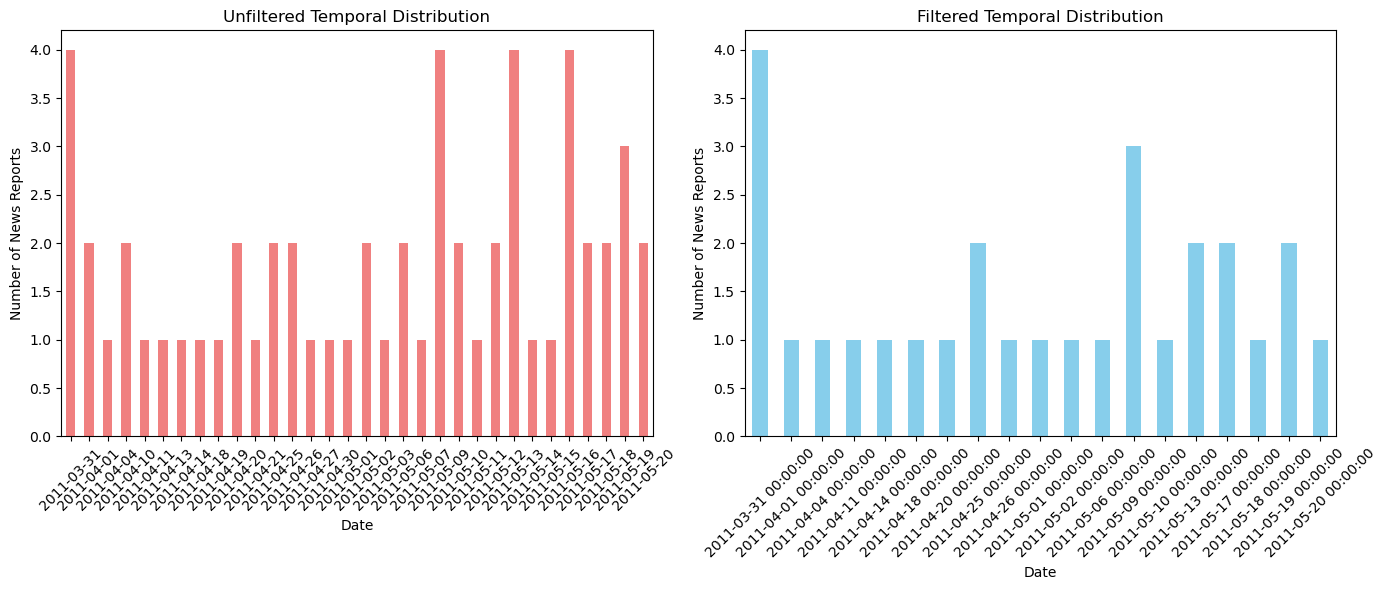

In [13]:
# Group by date and count the number of news reports for each date for both datasets
daily_counts_unfiltered = data.groupby(data['Date']).size()
daily_counts_filtered = filtered_data.groupby(filtered_data['Date']).size()

# Plot the histograms side by side
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
daily_counts_unfiltered.plot(kind='bar', color='lightcoral')
plt.title('Unfiltered Temporal Distribution')
plt.xlabel('Date')
plt.ylabel('Number of News Reports')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
daily_counts_filtered.plot(kind='bar', color='skyblue')
plt.title('Filtered Temporal Distribution')
plt.xlabel('Date')
plt.ylabel('Number of News Reports')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
